In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)

In [3]:
#Read in NEW DATA NOVEMBER 2019
alz_t = readRDS("/projects/gilbert_lab/Lutz/Alzheimers/Update_Oct2019/PS_for_analysis/alz_t.rds")

alz_t_fecal = subset_samples(alz_t, SampleType=="Fecal")
alz_t_cecal = subset_samples(alz_t, SampleType=="Cecal")

alz_t_cecal_control = subset_samples(alz_t_cecal, Treatment=="Control")
alz_t_cecal_ABX = subset_samples(alz_t_cecal, Treatment=="Abx")

alz_t_fec_M = subset_samples(alz_t_fecal, Sex=="M")
alz_t_fec_F = subset_samples(alz_t_fecal, Sex=="F")
alz_t_cec_M = subset_samples(alz_t_cecal, Sex=="M")
alz_t_cec_F = subset_samples(alz_t_cecal, Sex=="F")

In [4]:
alz.dist.cecal = distance(alz_t_fecal, method = "unifrac", type = "samples")
alz.dist.log.cecal = ordinate(alz_t_fecal, method = "PCoA", distance = "wunifrac")


Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- f6be0381fef70a81fd2fcb586ce0b3c7 -- in the phylogenetic tree in the data you provided.”
Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- f2a8ea26f8a95a9ca96507a89c0f82c1 -- in the phylogenetic tree in the data you provided.”


In [45]:
x = unclass(alz.dist.log.cecal)
class(x)
#x2 = data.frame(x)
write.csv(x, "/gpfs/data/gilbert-lab/Lutz/Alzheimers/Update_Oct2019/data_for_Hemraj/bdiv/cecal.wuf.log.csv")

[1] "list"

In [18]:
alz.dist.fecal = distance(alz_t_fecal, method = "unifrac", type = "samples")
alz.dist.log.fecal = ordinate(alz_t_fecal, method = "PCoA", distance = "wunifrac")
alz.dist.evals.fecal = alz.dist.log.fecal$values$Eigenvalues
saveRDS(alz.dist.fecal, "/gpfs/data/gilbert-lab/Lutz/Alzheimers/Update_Oct2019/data_for_Hemraj/bdiv/fecal.wuf.dist.rds")
saveRDS(alz.dist.log.fecal, "/gpfs/data/gilbert-lab/Lutz/Alzheimers/Update_Oct2019/data_for_Hemraj/bdiv/fecal.wuf.log.rds")
saveRDS(alz.dist.evals.fecal, "/gpfs/data/gilbert-lab/Lutz/Alzheimers/Update_Oct2019/data_for_Hemraj/bdiv/fecal.wuf.evals.rds")

alz.dist.cecal = distance(alz_t_cecal, method = "unifrac", type = "samples")
alz.dist.log.cecal = ordinate(alz_t_cecal, method = "PCoA", distance = "wunifrac")
alz.dist.evals.cecal = alz.dist.log.cecal$values$Eigenvalues
saveRDS(alz.dist.cecal, "/gpfs/data/gilbert-lab/Lutz/Alzheimers/Update_Oct2019/data_for_Hemraj/bdiv/cecal.wuf.dist.rds")
saveRDS(alz.dist.log.cecal, "/gpfs/data/gilbert-lab/Lutz/Alzheimers/Update_Oct2019/data_for_Hemraj/bdiv/cecal.wuf.log.rds")
saveRDS(alz.dist.evals.cecal, "/gpfs/data/gilbert-lab/Lutz/Alzheimers/Update_Oct2019/data_for_Hemraj/bdiv/cecal.wuf.evals.rds")


Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- 02a815f7142f217fd971f1941c3cb9ac -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- f2d95550080afa6b6007cd489af63c90 -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- e4e117cf82380ecda69190ad8320b5c4 -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- 41e8f5e69f4f0d2bfce2d5658be3af79 -- in the phylogenetic tree in the data you provided.”

### FECAL

#### Unweighted UniFrac

Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- ec5aaf6c4c07befef14be9c35223ee07 -- in the phylogenetic tree in the data you provided.”
Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- aeac6a0b9012330bbfa09b8d75f37195 -- in the phylogenetic tree in the data you provided.”


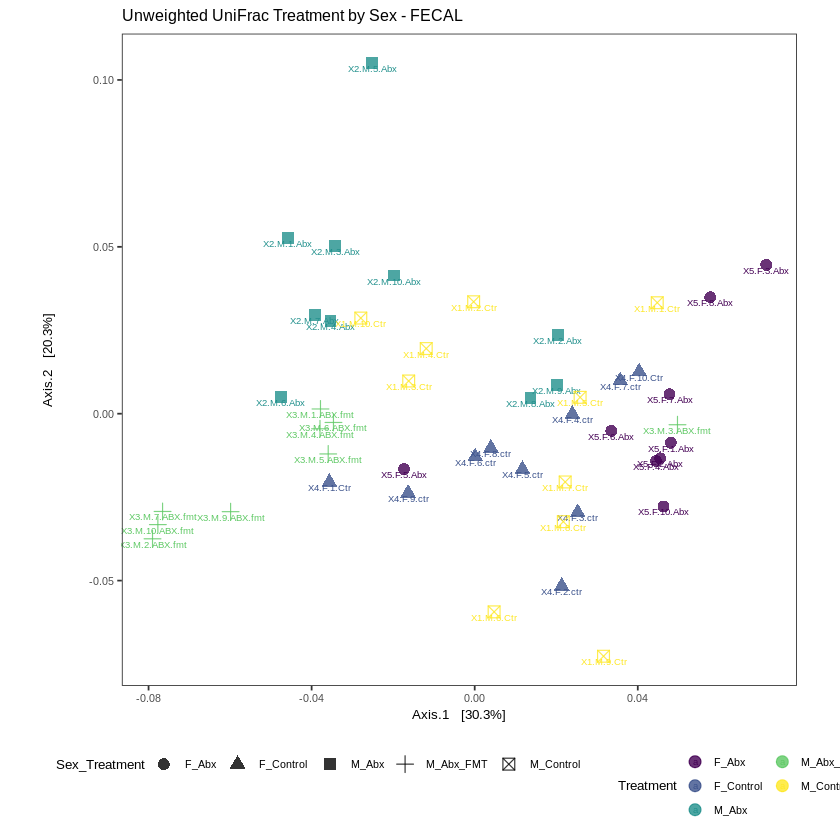

png 
  2

png 
  2

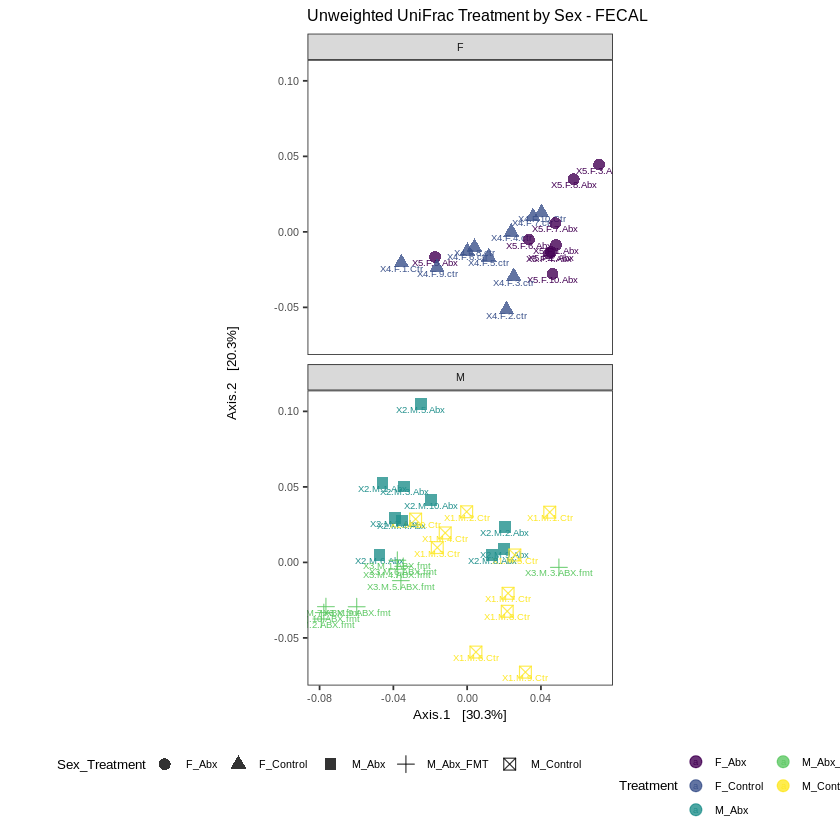

In [6]:
library(viridis)

alz.dist.fecal = distance(alz_t_fecal, method = "unifrac", type = "samples")
alz.dist.log.fecal = ordinate(alz_t_fecal, method = "PCoA", distance = "wunifrac")
alz.dist.evals.fecal = alz.dist.log.fecal$values$Eigenvalues

p = plot_ordination(alz_t_fecal, alz.dist.log.fecal, color = "Sex_Treatment", shape = "Sex_Treatment", label="X.SampleID") + 
    ggtitle("Unweighted UniFrac Treatment by Sex - FECAL") +
    geom_point(size=3, alpha=0.8) + 
    scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    #stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Treatment), linetype=0) +
    #scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    coord_fixed(sqrt(alz.dist.evals.fecal[2] / alz.dist.evals.fecal[1]))

p = p + guides(colour = guide_legend(title = "Treatment", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")

p$layers <- p$layers[-1]

p

p2 = p + facet_wrap(~Sex, ncol=1)

p2

png('/projects/gilbert_lab/Lutz/Alzheimers/Update_Oct2019/data_for_Hemraj/bdiv/sex_by_treatment.png', width=6, height=5, units='in', res=300)
plot(p)
dev.off()

png('/projects/gilbert_lab/Lutz/Alzheimers/Update_Oct2019/data_for_Hemraj/bdiv/sex_by_treatment.facet.png', width=6, height=5, units='in', res=300)
plot(p2)
dev.off()

#### Weighted UniFrac

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- 9c8605abd883e27411e47085b89180df -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- 4fc11f482ea4798c9c9d65db8f1ef1e8 -- in the phylogenetic tree in the data you provided.”

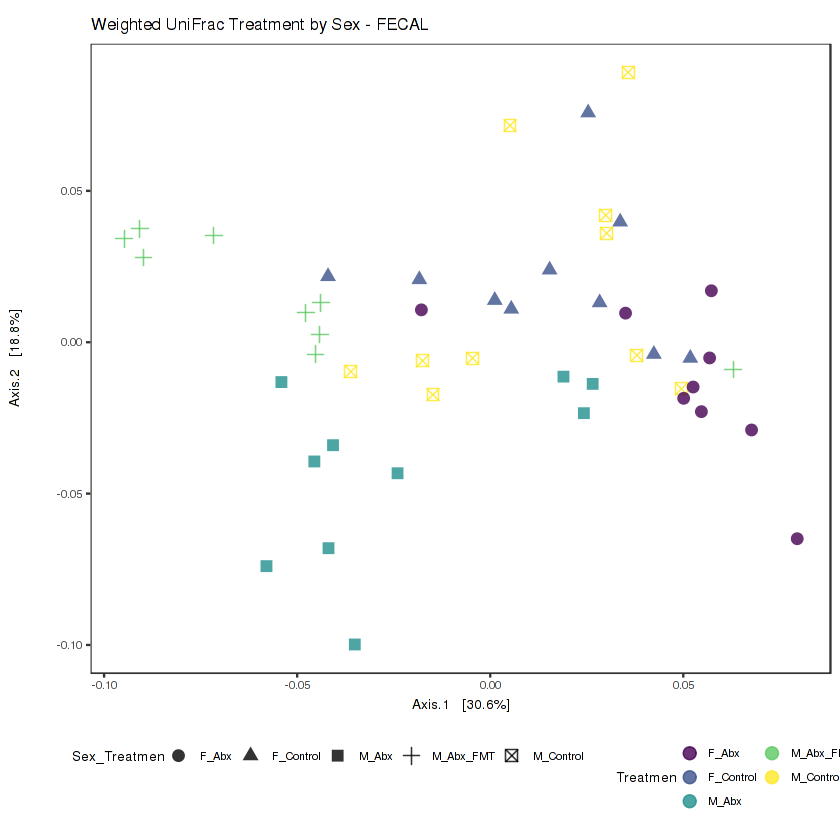

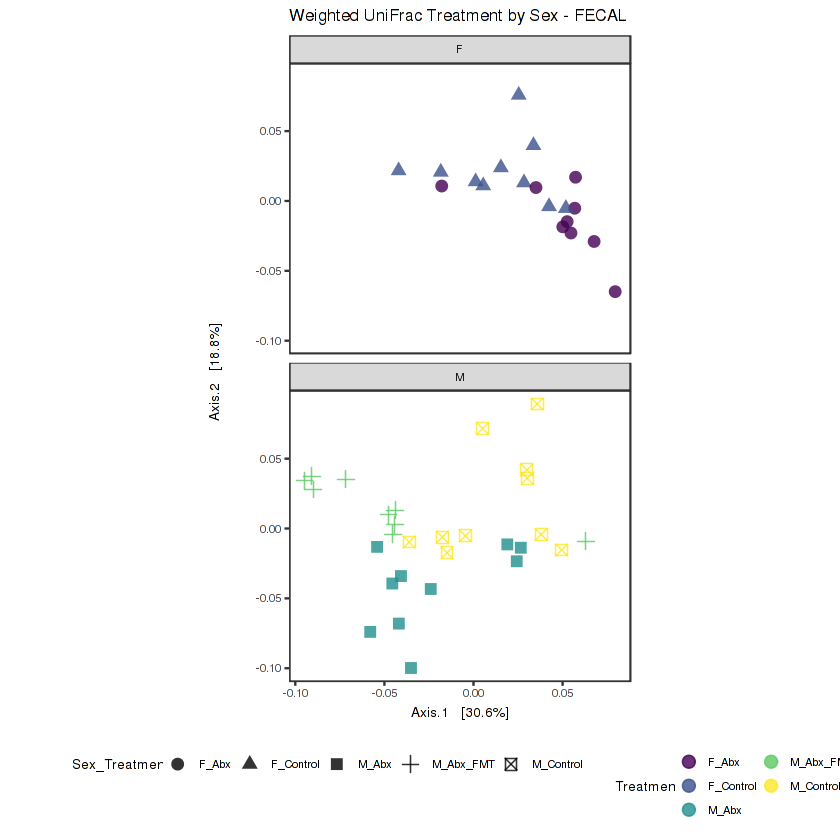

In [22]:
library(viridis)

alz.dist.fecal = distance(alz_t_fecal, method = "wunifrac", type = "samples")
alz.dist.log.fecal = ordinate(alz_t_fecal, method = "PCoA", distance = "wunifrac")
alz.dist.evals.fecal = alz.dist.log.fecal$values$Eigenvalues

p = plot_ordination(alz_t_fecal, alz.dist.log.fecal, color = "Sex_Treatment", shape = "Sex_Treatment") + #, label="X.SampleID") + 
    ggtitle("Weighted UniFrac Treatment by Sex - FECAL") +
    geom_point(size=3, alpha=0.8) + 
    scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    #stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Treatment), linetype=0) +
    #scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    coord_fixed(sqrt(alz.dist.evals.fecal[2] / alz.dist.evals.fecal[1]))

p = p + guides(colour = guide_legend(title = "Treatment", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")

p$layers <- p$layers[-1]

p

p2 = p + facet_wrap(~Sex, ncol=1)

p2

#png('sex_f_by_treatment.png', width=6, height=5, units='in', res=300)
#plot(p)
#dev.off()

#### Unweighted Unifrac PERMANOVA

In [78]:
#Difference between treatment group within sex
#Male
alz_t_fec_M.dist.unif = distance(alz_t_fec_M, method = "unifrac", type = "samples")
alz.fec.M.df = data.frame(sample_data(alz_t_fec_M))
alz.fec.M.unif.adtest = adonis2(alz_t_fec_M.dist.unif ~ Treatment, data=alz.fec.M.df)
alz.fec.M.unif.adtest
#Female
alz_t_fec_F.dist.unif = distance(alz_t_fec_F, method = "unifrac", type = "samples")
alz.fec.F.df = data.frame(sample_data(alz_t_fec_F))
alz.fec.F.unif.adtest = adonis2(alz_t_fec_F.dist.unif ~ Treatment, data=alz.fec.F.df)
alz.fec.F.unif.adtest

#Differences between sexes within treatment group
#Control
alz_t_fec.dist.unif = distance(alz_t_fecal_control, method = "unifrac", type = "samples")
alz.fec.control.df = data.frame(sample_data(alz_t_fecal_control))
alz.fec.control.unif.adtest = adonis2(alz_t_fec.dist.unif ~ Sex, data=alz.fec.control.df)
alz.fec.control.unif.adtest
#Abx
alz_t_fec.dist.unif = distance(alz_t_fecal_ABX, method = "unifrac", type = "samples")
alz.fec.abx.df = data.frame(sample_data(alz_t_fecal_ABX))
alz.fec.abx.unif.adtest = adonis2(alz_t_fec.dist.unif ~ Sex, data=alz.fec.abx.df)
alz.fec.abx.unif.adtest

Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- bb0cd1c91d415b92533a3dc96db88374 -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Treatment,2,0.6808427,0.2326271,3.940915,0.001
Residual,26,2.2459134,0.7673729,NA,NA
Total,28,2.9267561,1.0000000,NA,NA


Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- 2b7f00c067ed37d678b58707fcc56e50 -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Treatment,1,0.6031075,0.2746856,6.43811,0.001
Residual,17,1.5925212,0.7253144,NA,NA
Total,18,2.1956287,1.0000000,NA,NA


Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- a5c2e6ea2b146907392b65f681240928 -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Sex,1,0.1061556,0.06567487,1.265242,0.164
Residual,18,1.5102252,0.93432513,NA,NA
Total,19,1.6163808,1.00000000,NA,NA


Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- 5379fdb8eb917eca4fd878af89ff4115 -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Sex,1,0.2747353,0.1306782,2.555475,0.014
Residual,17,1.8276451,0.8693218,NA,NA
Total,18,2.1023804,1.0000000,NA,NA


#### Weighted Unifrac PERMANOVA

In [77]:
#Difference between treatment group within sex
#Male
alz_t_fec_M.dist.wunif = distance(alz_t_fec_M, method = "wunifrac", type = "samples")
alz.fec.M.df = data.frame(sample_data(alz_t_fec_M))
alz.fec.M.wunif.adtest = adonis2(alz_t_fec_M.dist.wunif ~ Treatment, data=alz.fec.M.df)
alz.fec.M.wunif.adtest
#Female
alz_t_fec_F.dist.wunif = distance(alz_t_fec_F, method = "wunifrac", type = "samples")
alz.fec.F.df = data.frame(sample_data(alz_t_fec_F))
alz.fec.F.wunif.adtest = adonis2(alz_t_fec_F.dist.wunif ~ Treatment, data=alz.fec.F.df)
alz.fec.F.wunif.adtest

#Differences between sexes within treatment group
#Control
alz_t_fec.dist.wunif = distance(alz_t_fecal_control, method = "wunifrac", type = "samples")
alz.fec.control.df = data.frame(sample_data(alz_t_fecal_control))
alz.fec.control.wunif.adtest = adonis2(alz_t_fec.dist.wunif ~ Sex, data=alz.fec.control.df)
alz.fec.control.wunif.adtest
#Abx
alz_t_fec.dist.wunif = distance(alz_t_fecal_ABX, method = "wunifrac", type = "samples")
alz.fec.abx.df = data.frame(sample_data(alz_t_fecal_ABX))
alz.fec.abx.wunif.adtest = adonis2(alz_t_fec.dist.wunif ~ Sex, data=alz.fec.abx.df)
alz.fec.abx.wunif.adtest

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- 44ff22e644697df95cbb102298a748ea -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Treatment,2,0.09029894,0.3311163,6.435367,0.001
Residual,26,0.18241170,0.6688837,NA,NA
Total,28,0.27271064,1.0000000,NA,NA


Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- ce41b5afe392b47adeab39d7fa943f0c -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Treatment,1,0.03010591,0.266627,6.180565,0.001
Residual,17,0.08280803,0.733373,NA,NA
Total,18,0.11291393,1.000000,NA,NA


Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- 5b0645f72373722861dd2953c6121d01 -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Sex,1,0.006271434,0.1055453,2.123993,0.045
Residual,18,0.053147917,0.8944547,NA,NA
Total,19,0.059419352,1.0000000,NA,NA


Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- 1d5ab75b320aeb74c80516e444077755 -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Sex,1,0.04768720,0.3472297,9.042853,0.001
Residual,17,0.08964896,0.6527703,NA,NA
Total,18,0.13733616,1.0000000,NA,NA


### CECAL

Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- 95d45246fb908dbc68e9c057df584d01 -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- 2a248c8ca446856290e3cd3a7a1e9ea4 -- in the phylogenetic tree in the data you provided.”

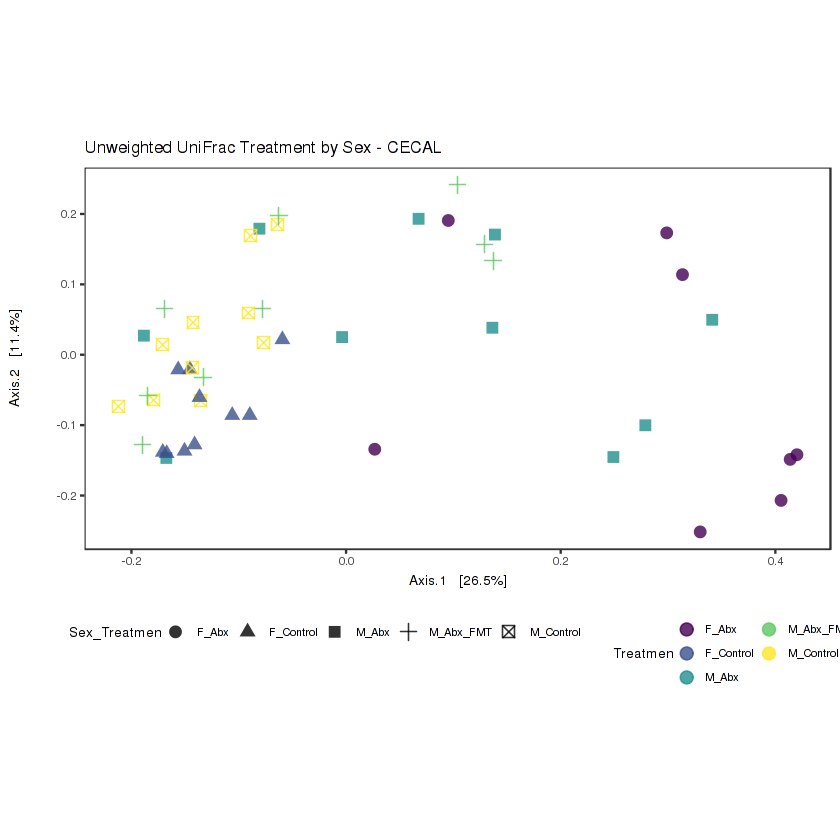

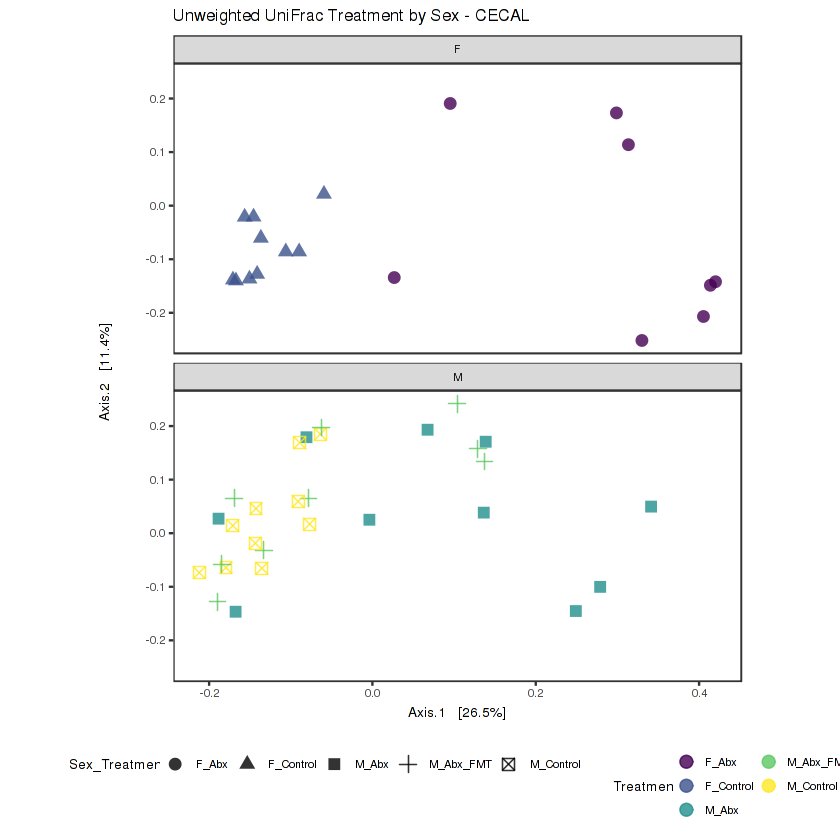

In [27]:
library(viridis)

alz.dist.cecal = distance(alz_t_cecal, method = "unifrac", type = "samples")
alz.dist.log.cecal = ordinate(alz_t_cecal, method = "PCoA", distance = "unifrac")
alz.dist.evals.cecal = alz.dist.log.cecal$values$Eigenvalues

p = plot_ordination(alz_t_cecal, alz.dist.log.cecal, color = "Sex_Treatment", shape = "Sex_Treatment") + #, label="X.SampleID") + 
    ggtitle("Unweighted UniFrac Treatment by Sex - CECAL") +
    geom_point(size=3, alpha=0.8) + 
    scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    #stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Treatment), linetype=0) +
    #scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    coord_fixed(sqrt(alz.dist.evals.cecal[2] / alz.dist.evals.cecal[1]))

p = p + guides(colour = guide_legend(title = "Treatment", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")

p$layers <- p$layers[-1]

p

p2 = p + facet_wrap(~Sex, ncol=1)

p2

#png('sex_f_by_treatment.png', width=6, height=5, units='in', res=300)
#plot(p)
#dev.off()

In [23]:
#Difference between treatment group within sex
#Male
alz_t_cec_M.dist.unif = distance(alz_t_cec_M, method = "unifrac", type = "samples")
alz.cec.M.df = data.frame(sample_data(alz_t_cec_M))
alz.cec.M.unif.adtest = adonis2(alz_t_cec_M.dist.unif ~ Treatment, data=alz.cec.M.df)
alz.cec.M.unif.adtest
#Female
alz_t_cec_F.dist.unif = distance(alz_t_cec_F, method = "unifrac", type = "samples")
alz.cec.F.df = data.frame(sample_data(alz_t_cec_F))
alz.cec.F.unif.adtest = adonis2(alz_t_cec_F.dist.unif ~ Treatment, data=alz.cec.F.df)
alz.cec.F.unif.adtest

#Differences between sexes within treatment group
#Control
alz_t_cec.dist.unif = distance(alz_t_cecal_control, method = "unifrac", type = "samples")
alz.cec.control.df = data.frame(sample_data(alz_t_cecal_control))
alz.cec.control.unif.adtest = adonis2(alz_t_cec.dist.unif ~ Sex, data=alz.cec.control.df)
alz.cec.control.unif.adtest
#Abx
alz_t_cec.dist.unif = distance(alz_t_cecal_ABX, method = "unifrac", type = "samples")
alz.cec.abx.df = data.frame(sample_data(alz_t_cecal_ABX))
alz.cec.abx.unif.adtest = adonis2(alz_t_cec.dist.unif ~ Sex, data=alz.cec.abx.df)
alz.cec.abx.unif.adtest

Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- 9de39561caafff948608dc50267dea53 -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Treatment,2,0.4474468,0.1318139,1.973748,0.009
Residual,26,2.9470880,0.8681861,NA,NA
Total,28,3.3945348,1.0000000,NA,NA


Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- b071cfbe7f44435b348de7ad1688d73c -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Treatment,1,0.8131942,0.3350372,8.061496,0.001
Residual,16,1.6139818,0.6649628,NA,NA
Total,17,2.4271760,1.0000000,NA,NA


Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- 7670f7777bd47d3fcb4e3c8b7308b72d -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Sex,1,0.1548327,0.09136821,1.810005,0.011
Residual,18,1.5397686,0.90863179,NA,NA
Total,19,1.6946013,1.00000000,NA,NA


Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- 2e02a71a929cd85d4404619c72f7baa0 -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Sex,1,0.4437071,0.1531905,2.894451,0.012
Residual,16,2.4527323,0.8468095,NA,NA
Total,17,2.8964394,1.0000000,NA,NA


Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- 87cf1196d21c2399750fa4498439c3dd -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- 8fe6312f1bcde84da7bd3adc0f2eb0f4 -- in the phylogenetic tree in the data you provided.”

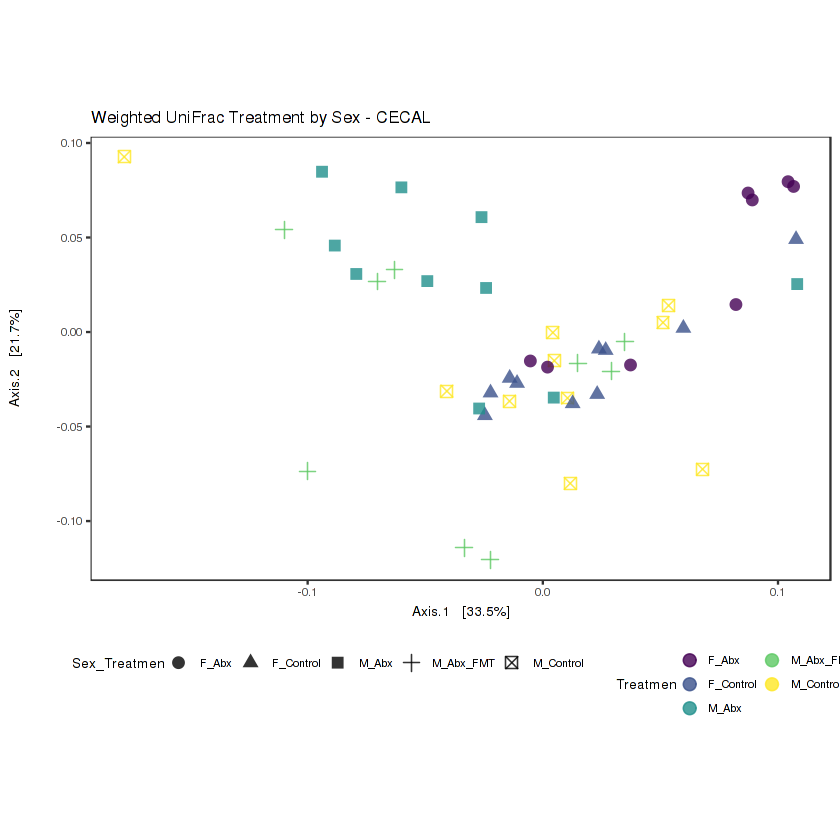

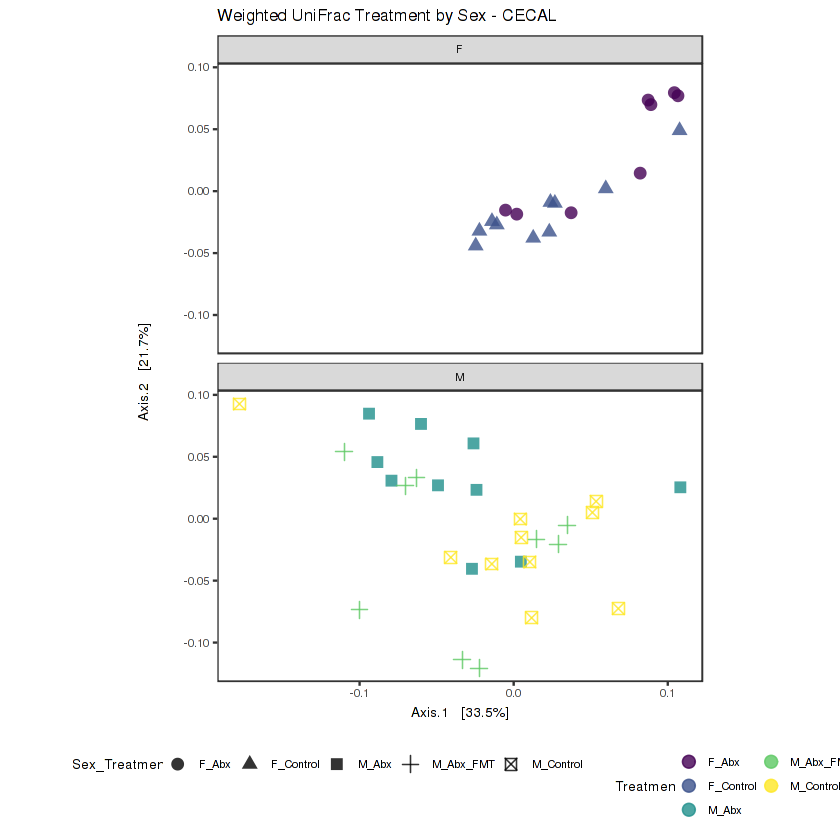

In [25]:
library(viridis)

alz.dist.cecal = distance(alz_t_cecal, method = "wunifrac", type = "samples")
alz.dist.log.cecal = ordinate(alz_t_cecal, method = "PCoA", distance = "wunifrac")
alz.dist.evals.cecal = alz.dist.log.cecal$values$Eigenvalues

p = plot_ordination(alz_t_cecal, alz.dist.log.cecal, color = "Sex_Treatment", shape = "Sex_Treatment") + #, label="X.SampleID") + 
    ggtitle("Weighted UniFrac Treatment by Sex - CECAL") +
    geom_point(size=3, alpha=0.8) + 
    scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    #stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Treatment), linetype=0) +
    #scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    coord_fixed(sqrt(alz.dist.evals.cecal[2] / alz.dist.evals.cecal[1]))

p = p + guides(colour = guide_legend(title = "Treatment", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")

p$layers <- p$layers[-1]

p

p2 = p + facet_wrap(~Sex, ncol=1)

p2

#png('sex_f_by_treatment.png', width=6, height=5, units='in', res=300)
#plot(p)
#dev.off()

In [26]:
#Difference between treatment group within sex
#Male
alz_t_cec_M.dist.wunif = distance(alz_t_cec_M, method = "wunifrac", type = "samples")
alz.cec.M.df = data.frame(sample_data(alz_t_cec_M))
alz.cec.M.wunif.adtest = adonis2(alz_t_cec_M.dist.wunif ~ Treatment, data=alz.cec.M.df)
alz.cec.M.wunif.adtest
#Female
alz_t_cec_F.dist.wunif = distance(alz_t_cec_F, method = "wunifrac", type = "samples")
alz.cec.F.df = data.frame(sample_data(alz_t_cec_F))
alz.cec.F.wunif.adtest = adonis2(alz_t_cec_F.dist.wunif ~ Treatment, data=alz.cec.F.df)
alz.cec.F.wunif.adtest

#Differences between sexes within treatment group
#Control
alz_t_cec.dist.wunif = distance(alz_t_cecal_control, method = "wunifrac", type = "samples")
alz.cec.control.df = data.frame(sample_data(alz_t_cecal_control))
alz.cec.control.wunif.adtest = adonis2(alz_t_cec.dist.wunif ~ Sex, data=alz.cec.control.df)
alz.cec.control.wunif.adtest
#Abx
alz_t_cec.dist.wunif = distance(alz_t_cecal_ABX, method = "wunifrac", type = "samples")
alz.cec.abx.df = data.frame(sample_data(alz_t_cecal_ABX))
alz.cec.abx.wunif.adtest = adonis2(alz_t_cec.dist.wunif ~ Sex, data=alz.cec.abx.df)
alz.cec.abx.wunif.adtest

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- 1e40d6d32efb5f1d289ebe33ebdb0738 -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Treatment,2,0.03619592,0.1275203,1.90006,0.065
Residual,26,0.24764840,0.8724797,NA,NA
Total,28,0.28384432,1.0000000,NA,NA


Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- 457c750f9a11cb1ddaeea49b2967685d -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Treatment,1,0.03417163,0.243912,5.161559,0.004
Residual,16,0.10592654,0.756088,NA,NA
Total,17,0.14009816,1.000000,NA,NA


Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- 2d452c8b095e9566a790c023bc2bceed -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Sex,1,0.01271197,0.05571963,1.062135,0.374
Residual,18,0.21542967,0.94428037,NA,NA
Total,19,0.22814164,1.00000000,NA,NA


Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- d3f6e5ee86aaf936f5dcc50d43a06d43 -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Sex,1,0.03441813,0.2576411,5.552919,0.003
Residual,16,0.09917127,0.7423589,NA,NA
Total,17,0.13358940,1.0000000,NA,NA
